In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN 
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append('../data')
    sys.path.append('../src')
from utils import plot_labeled_decision_regions

SEED = 1

### Read data

In [2]:
df = pd.read_csv(r"../data/wbc.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Select the two features and convert the target into binary

In [3]:
X = df[["radius_mean", "concave points_mean"]]
y = df["diagnosis"].replace({"M":1, "B":0})

### Split data into train and test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=SEED)

### Comparing entropy and gini

In [5]:
criterions = ["gini", "entropy"]

for criterion in criterions:

    # Instantiate dt_entropy, set 'entropy' as the information criterion
    dt = DecisionTreeClassifier(max_depth=8, criterion=criterion, random_state=SEED)

    # Fit dt_entropy to the training set
    dt.fit(X_train, y_train)

    # Evaluate accuracy_entropy
    accuracy = accuracy_score(y_test, dt.predict(X_test))

    # Print accuracy_entropy
    print(f'Accuracy achieved by using {criterion}: {accuracy:.3f}')

Accuracy achieved by using gini: 0.921
Accuracy achieved by using entropy: 0.886


### Voting Classifier

Logistic Regression : 0.886
K Nearest Neighbours : 0.912
Classification Tree : 0.886
Voting Classifier: 0.930


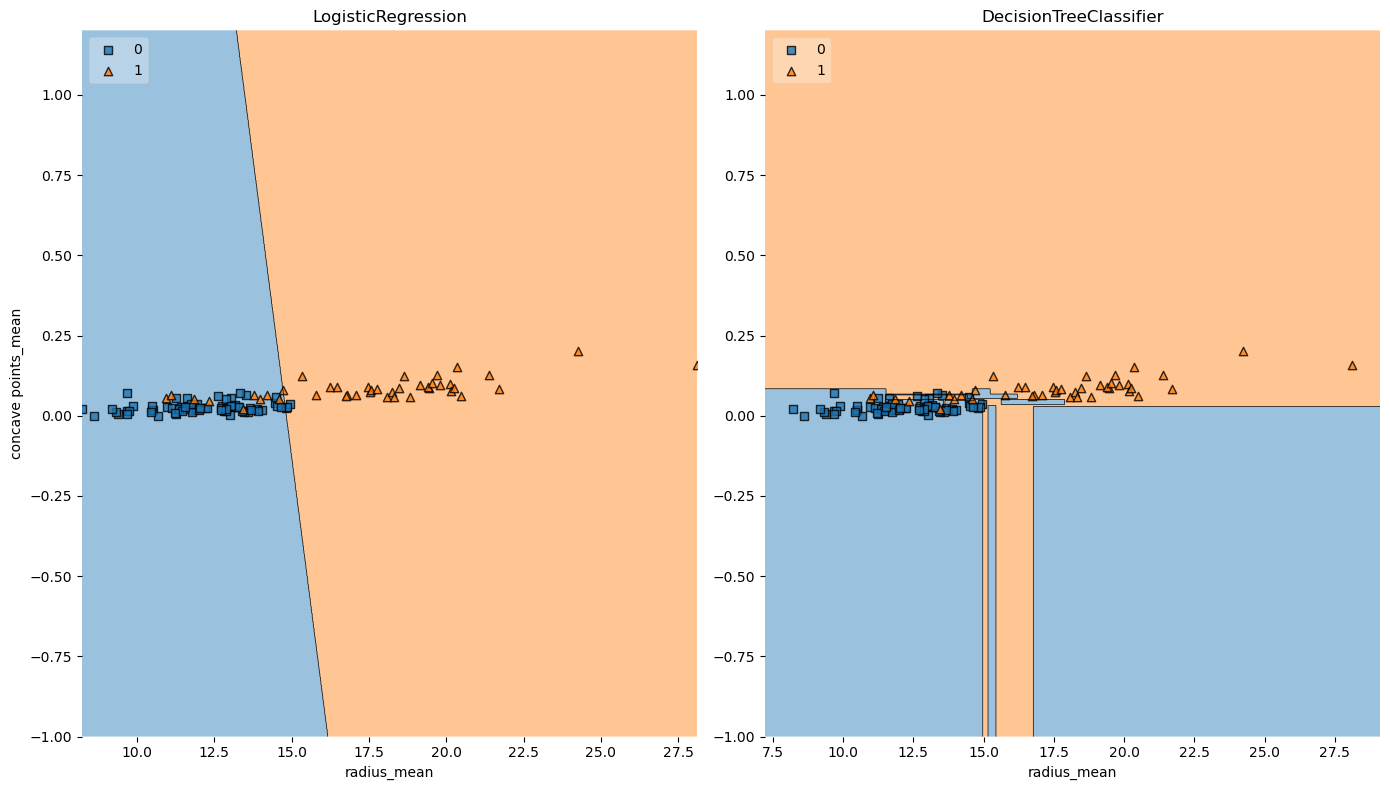

In [6]:
# Instantiate individual classifiers
lr = LogisticRegression(random_state=SEED)
knn = KNN()
criterion = "entropy" #"gini" #"entropy"
dt = DecisionTreeClassifier(max_depth=8, 
                            random_state=SEED, 
                            criterion=criterion
                            )

classifiers = [("Logistic Regression", lr),
               ("K Nearest Neighbours", knn),
               ("Classification Tree", dt)]

for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("{:s} : {:.3f}".format(clf_name, accuracy_score(y_test, y_pred)))

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, [lr, dt])

# Voting Classifier
vc = VotingClassifier(estimators=classifiers)

vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

print("Voting Classifier: {:.3f}".format(accuracy_score(y_test, y_pred)))